# Détection des feux de signalisation et panneaux de limitation de vitesse avec YOLOv8

## 1. Installer et importer les bibliothèques essentielles


In [2]:
# Install Essential Libraries
# !pip install ultralytics

In [1]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

## 2. Afficher les images originales avant détection

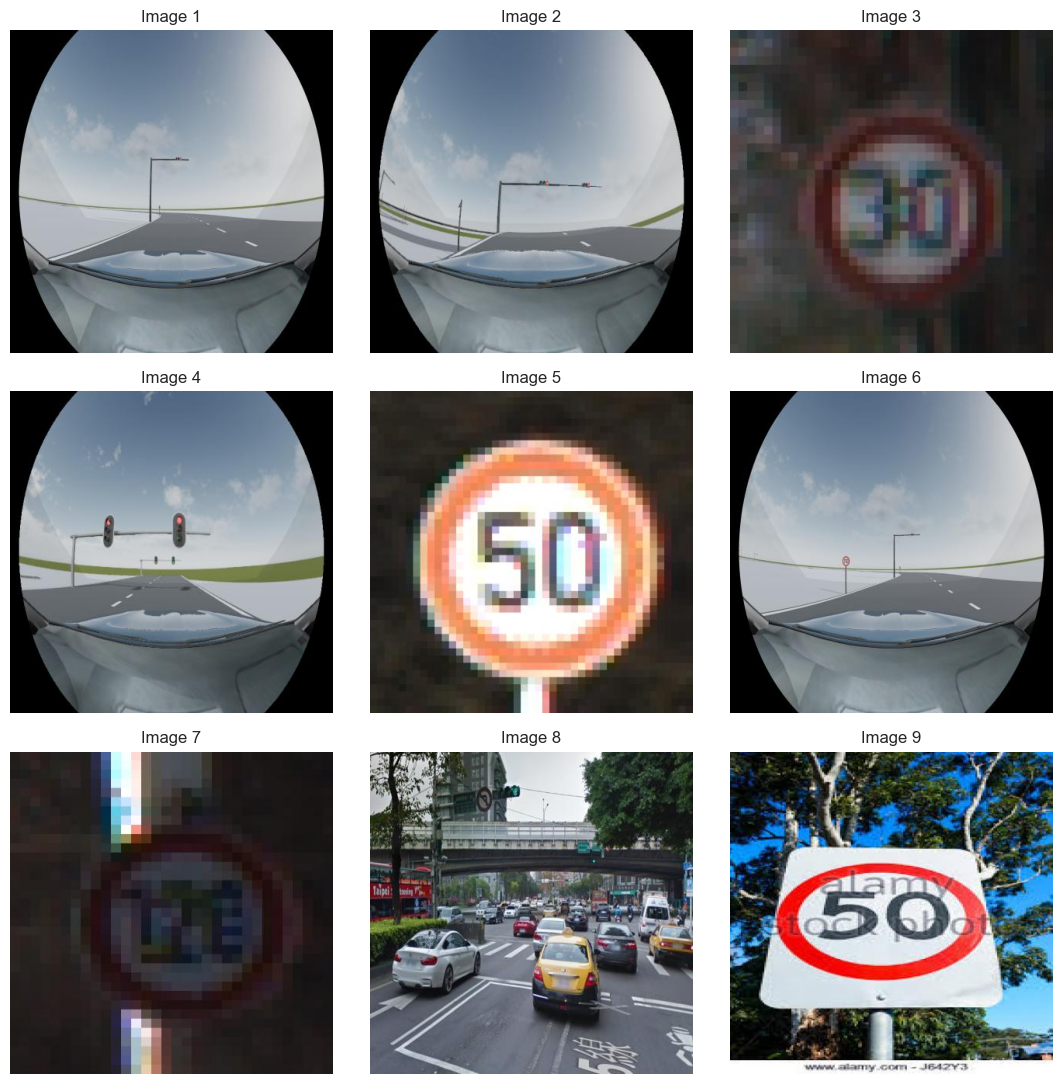

In [3]:
Image_dir = 'car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Get the size of the image
image = cv2.imread("car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


## 3. Test de YOLOv8 pré-entraîné pour détecter les panneaux de signalisation


image 1/1 /Users/antoine/Documents/Dev/Ecole/projet_memoire/kaggle_valid2/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 62.9ms
Speed: 3.7ms preprocess, 62.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


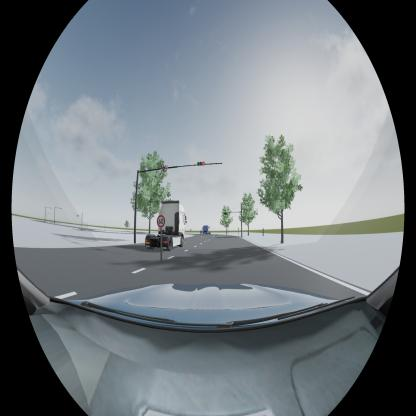

In [5]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## 4 Entraînement du modèle à l'aide d'un jeu de données personnalisé de panneaux de signalisation

In [8]:
# !pip install --upgrade ultralytics ray


In [6]:
# Build from YAML and transfer weights
Final_model = YOLO('runs/detect/train2/weights/last.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto', resume=True)


New https://pypi.org/project/ultralytics/8.3.163 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.161 🚀 Python-3.12.9 torch-2.2.2 CPU (Apple M3 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=car/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/train2/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, opti

train: Scanning /Users/antoine/Documents/Dev/Ecole/projet_memoire/kaggle_valid2/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
WARNING ⚠️ AutoBatch: intended for CUDA devices, using default batch-size 16
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 754.2±473.7 MB/s, size: 26.0 KB)


train: Scanning /Users/antoine/Documents/Dev/Ecole/projet_memoire/kaggle_valid2/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 704.3±341.8 MB/s, size: 19.9 KB)



val: Scanning /Users/antoine/Documents/Dev/Ecole/projet_memoire/kaggle_valid2/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training runs/detect/train2/weights/last.pt from epoch 23 to 30 total epochs
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.5508     0.4934     0.9388         13        640: 100%|██████████| 221/221 [16:13<00:00,  4.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:37<00:00,  3.74s/it]

                   all        801        944      0.949      0.859      0.935      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      24/30         0G     0.5374     0.4718     0.9359         14        640: 100%|██████████| 221/221 [16:05<00:00,  4.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:40<00:00,  3.88s/it]

                   all        801        944       0.94      0.881       0.94       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      25/30         0G     0.5351     0.4598     0.9284         11        640: 100%|██████████| 221/221 [16:07<00:00,  4.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:37<00:00,  3.73s/it]

                   all        801        944      0.962      0.889      0.953      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      26/30         0G     0.5257      0.433     0.9245         11        640: 100%|██████████| 221/221 [16:02<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:36<00:00,  3.73s/it]

                   all        801        944      0.956      0.886      0.951      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      27/30         0G     0.5222     0.4324     0.9148         17        640: 100%|██████████| 221/221 [15:58<00:00,  4.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:36<00:00,  3.72s/it]

                   all        801        944      0.942      0.894      0.955      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      28/30         0G      0.512      0.405      0.915         11        640: 100%|██████████| 221/221 [16:09<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:37<00:00,  3.74s/it]

                   all        801        944      0.957      0.894      0.958      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      29/30         0G     0.5076     0.3972     0.9118         14        640: 100%|██████████| 221/221 [16:04<00:00,  4.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:37<00:00,  3.74s/it]

                   all        801        944      0.936      0.898      0.956      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      30/30         0G     0.5003     0.3956     0.9092         10        640: 100%|██████████| 221/221 [16:01<00:00,  4.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:36<00:00,  3.73s/it]

                   all        801        944      0.959       0.89      0.958      0.833

8 epochs completed in 2.363 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB


Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.12.9 torch-2.2.2 CPU (Apple M3 Pro)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:32<00:00,  3.54s/it]


                   all        801        944      0.958       0.89      0.958      0.833
           Green Light         87        122      0.858      0.693      0.848       0.51
             Red Light         74        108       0.83      0.722      0.833      0.522
       Speed Limit 100         52         52      0.961      0.955       0.99      0.911
       Speed Limit 110         17         17      0.955      0.941      0.987      0.898
       Speed Limit 120         60         60          1      0.896      0.991      0.924
        Speed Limit 20         56         56      0.979      0.982      0.985       0.85
        Speed Limit 30         71         74      0.985      0.959      0.986      0.929
        Speed Limit 40         53         55      0.952      0.927      0.984      0.884
        Speed Limit 50         68         71      0.984      0.852      0.967      0.868
        Speed Limit 60         76         76      0.986      0.932       0.96      0.872
        Speed Limit 7

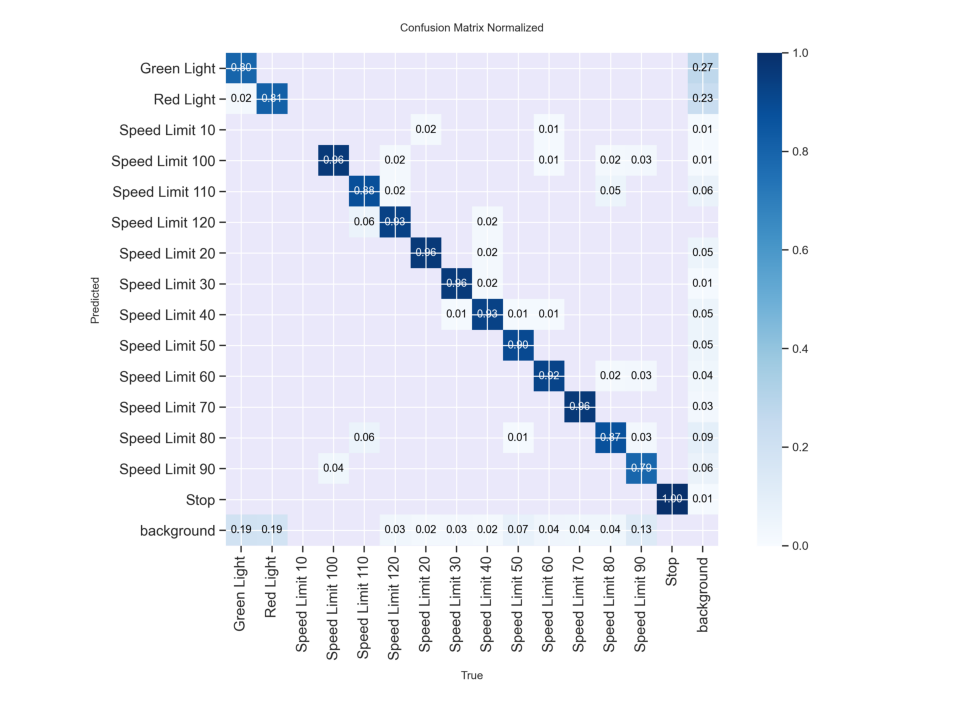

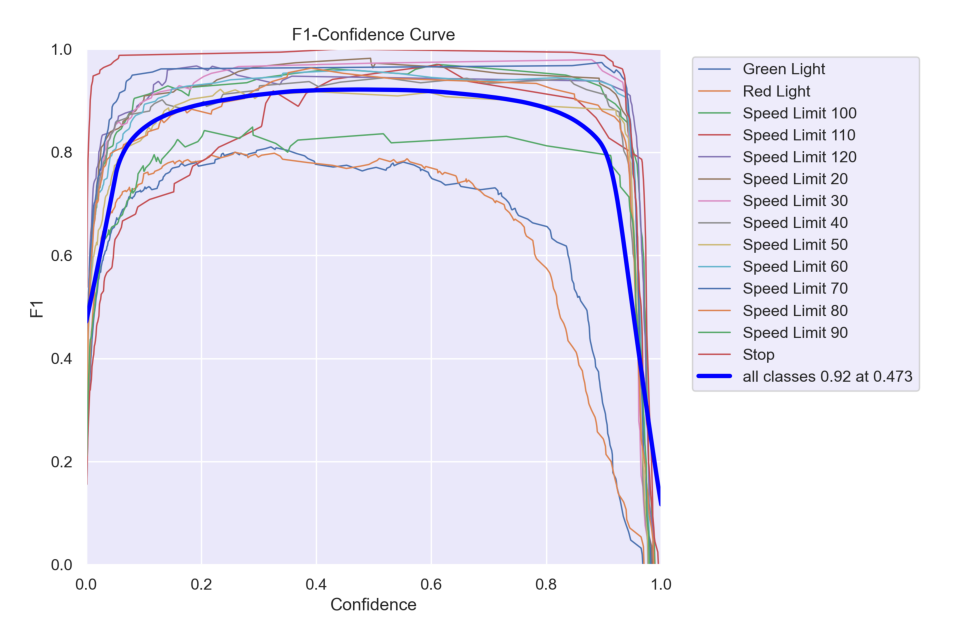

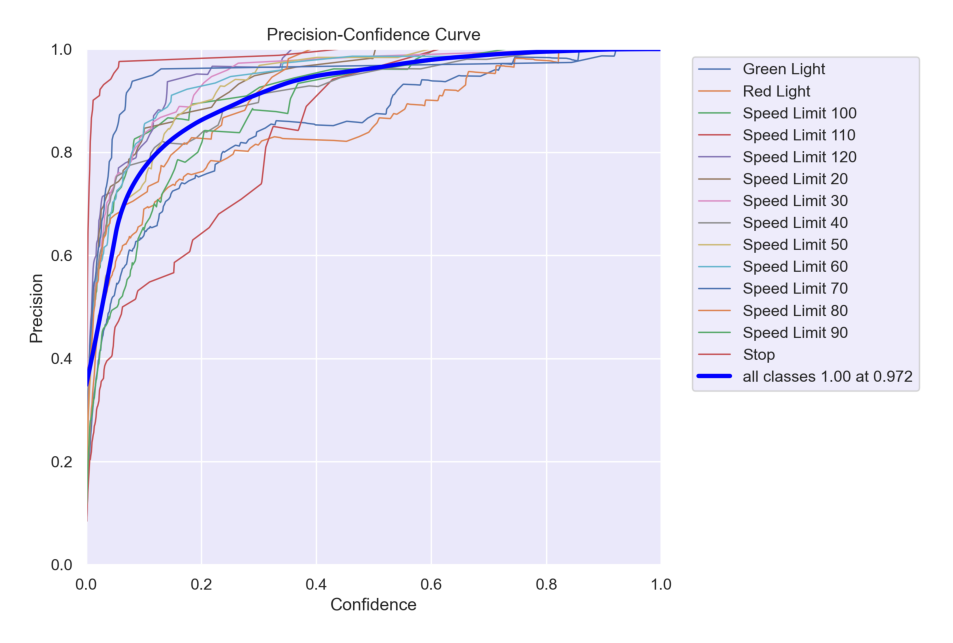

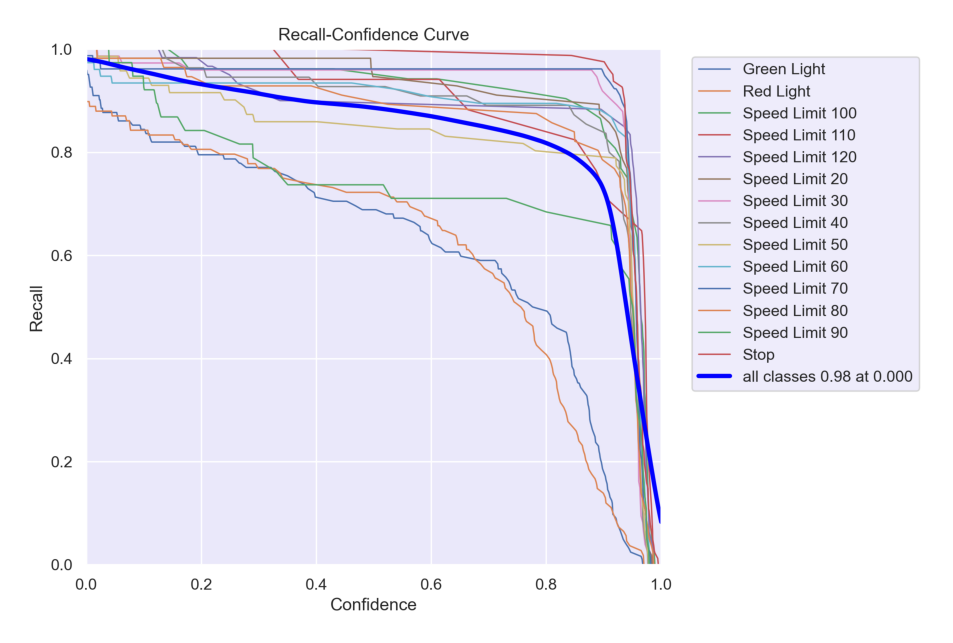

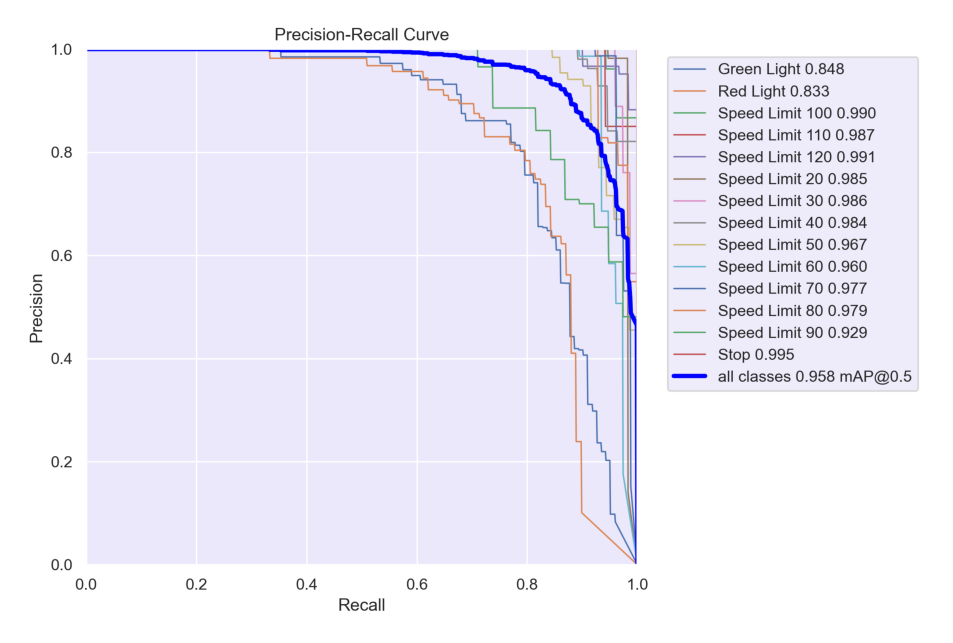

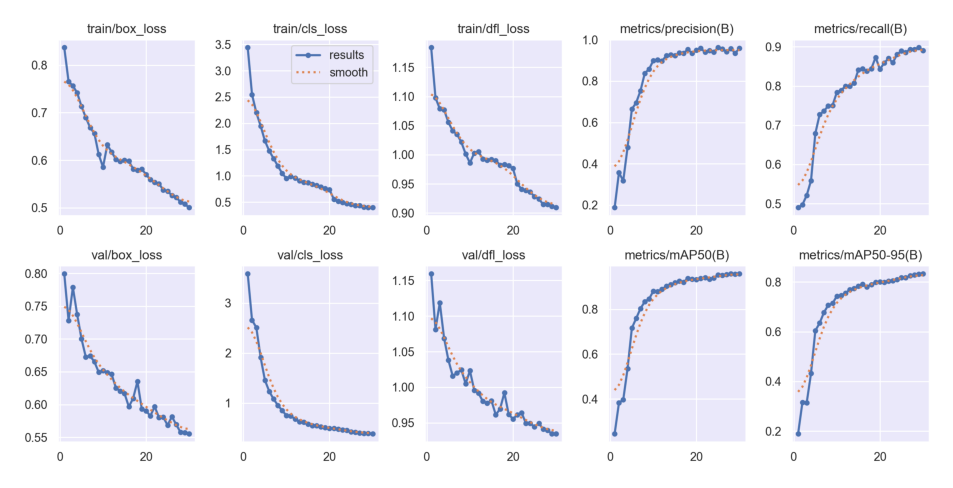

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'runs/detect/train2/'

# Display the images
display_images(post_training_files_path, image_files)


In [13]:
Result_Final_model = pd.read_csv('runs/detect/train2/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21  1067.26         0.55903         0.55743         0.95004   
21     22  2125.78         0.55394         0.51470         0.94102   
22     23  1071.13         0.55079         0.49342         0.93878   
23     24  2137.72         0.53742         0.47181         0.93591   
24     25  3202.47         0.53509         0.45978         0.92836   
25     26  4262.35         0.52572         0.43297         0.92446   
26     27  5318.01         0.52223         0.43241         0.91478   
27     28  6384.48         0.51195         0.40501         0.91502   
28     29  7446.63         0.50764         0.39722         0.91177   
29     30  8505.04         0.50032         0.39558         0.90923   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.95850            0.85862           0.93700   
21               0.93989            0.87052           0.94150   
22               0.94893            0.85947           0.93474   
23               0.94034            0.88060           0.93976   
24               0.96220            0.88949           0.95301   
25               0.95622            0.88602           0.95093   
26               0.94241            0.89371           0.95478   
27               0.95738            0.89383           0.95820   
28               0.93567            0.89793           0.95640   
29               0.95872            0.89028           0.95800   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.79952       0.58272       0.49007       0.96152  0.000179   
21              0.80298       0.59673       0.47883       0.96426  0.000161   
22              0.80543       0.58030       0.46058       0.94936  0.000144   
23              0.81036       0.58059       0.45436       0.94919  0.000127   
24              0.81823       0.56843       0.42348       0.94433  0.000109   
25              0.81782       0.58157       0.41484       0.94930  0.000092   
26              0.82535       0.56943       0.40340       0.94141  0.000075   
27              0.82853       0.55775       0.39128       0.93942  0.000057   
28              0.83134       0.55735       0.39326       0.93484  0.000040   
29              0.83331       0.55542       0.38509       0.93467  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

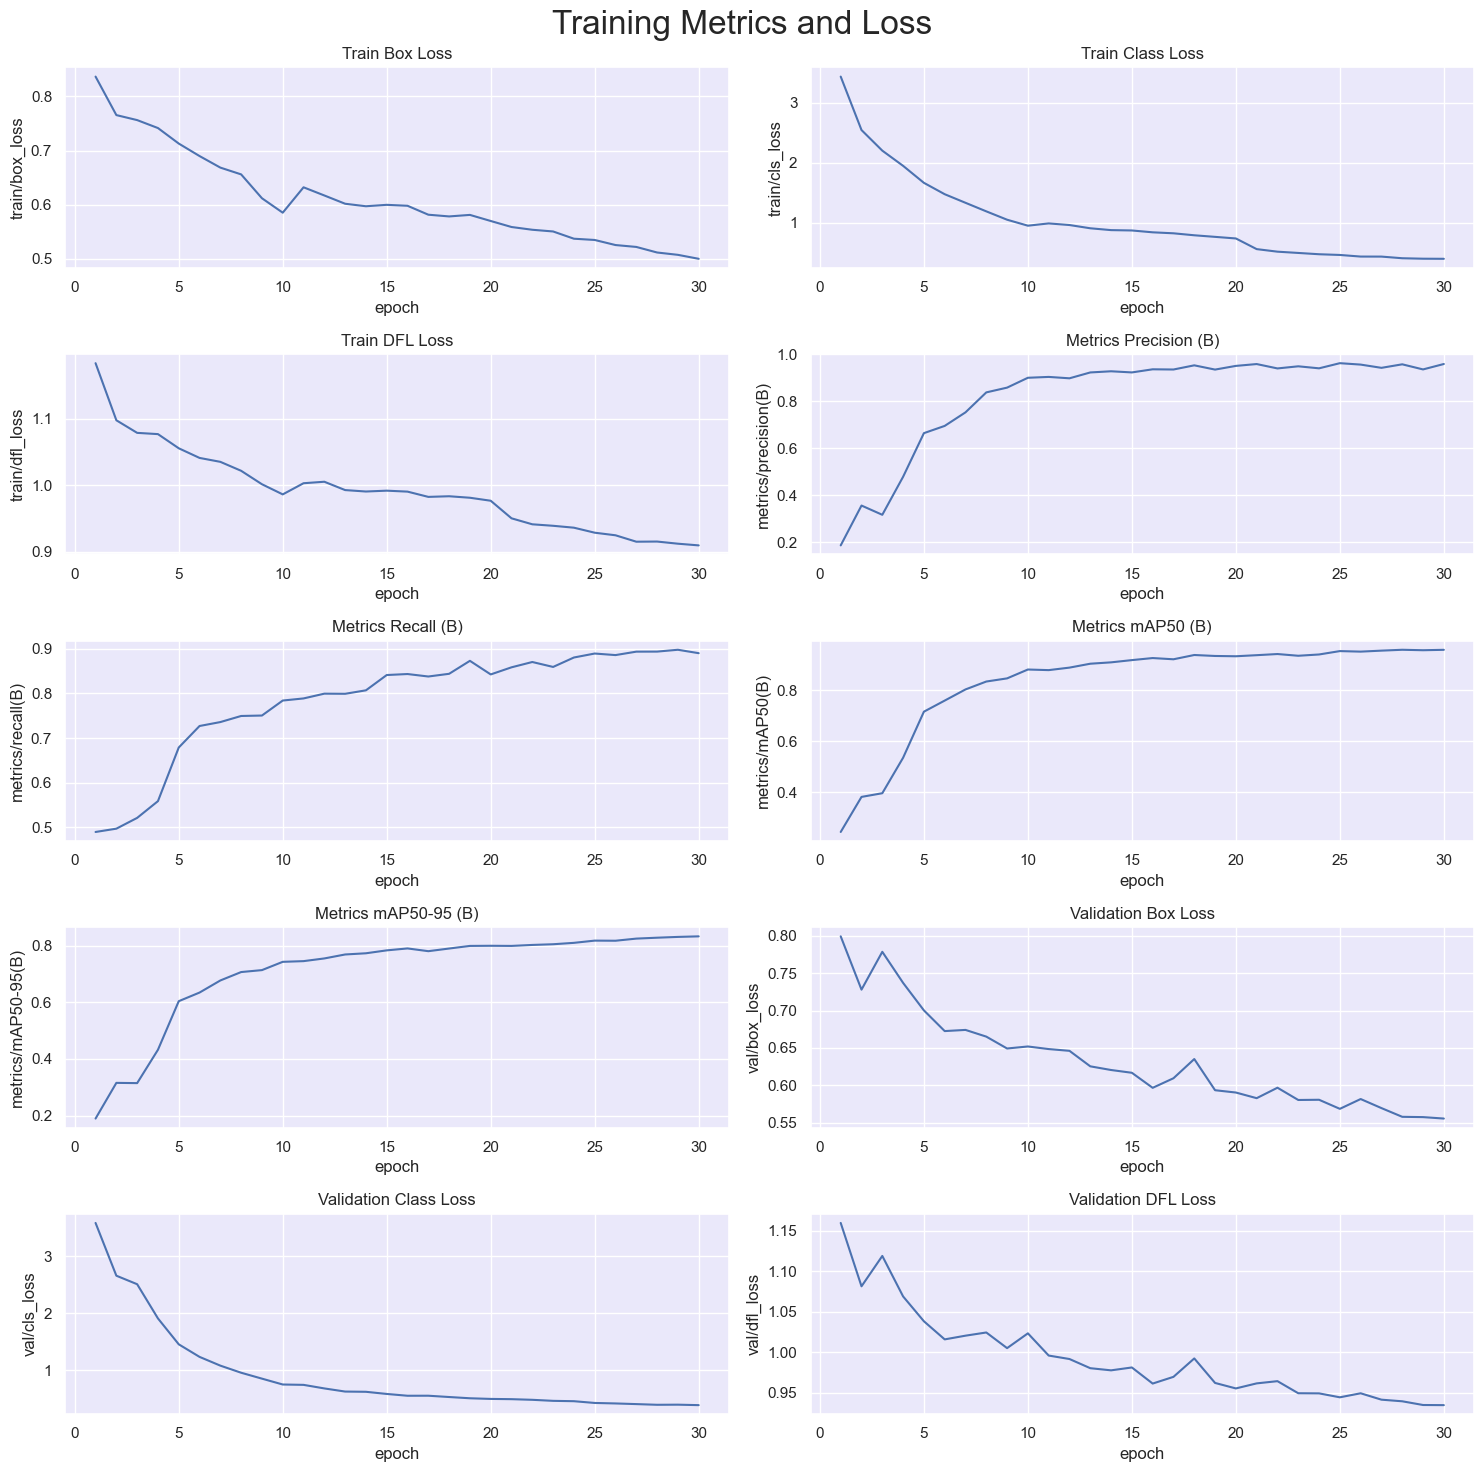

In [14]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

## 5. Validation du modèle par le jeu de test

In [15]:
# Loading the best performing model
Valid_model = YOLO('runs/detect/train2/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.161 🚀 Python-3.12.9 torch-2.2.2 CPU (Apple M3 Pro)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 121.8±48.5 MB/s, size: 22.4 KB)


val: Scanning /Users/antoine/Documents/Dev/Ecole/projet_memoire/kaggle_valid2/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [01:53<00:00,  2.22s/it]


                   all        801        944      0.958       0.89      0.958      0.833
           Green Light         87        122      0.858      0.693      0.848       0.51
             Red Light         74        108       0.83      0.722      0.833      0.522
       Speed Limit 100         52         52      0.961      0.955       0.99      0.911
       Speed Limit 110         17         17      0.955      0.941      0.987      0.898
       Speed Limit 120         60         60          1      0.896      0.991      0.924
        Speed Limit 20         56         56      0.979      0.982      0.985       0.85
        Speed Limit 30         71         74      0.985      0.959      0.986      0.929
        Speed Limit 40         53         55      0.952      0.927      0.984      0.884
        Speed Limit 50         68         71      0.984      0.852      0.967      0.868
        Speed Limit 60         76         76      0.986      0.932       0.96      0.872
        Speed Limit 7

## 6. Prédictions sur les images de test


0: 640x640 1 Stop, 58.0ms
Speed: 1.3ms preprocess, 58.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 110, 46.6ms
Speed: 1.0ms preprocess, 46.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 39.6ms
Speed: 0.9ms preprocess, 39.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 45.1ms
Speed: 0.9ms preprocess, 45.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 46.5ms
Speed: 0.9ms preprocess, 46.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 39.9ms
Speed: 2.3ms preprocess, 39.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 50, 47.0ms
Speed: 1.5ms preprocess, 47.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 47.6ms
Speed: 0.8ms preprocess, 47.6ms inf

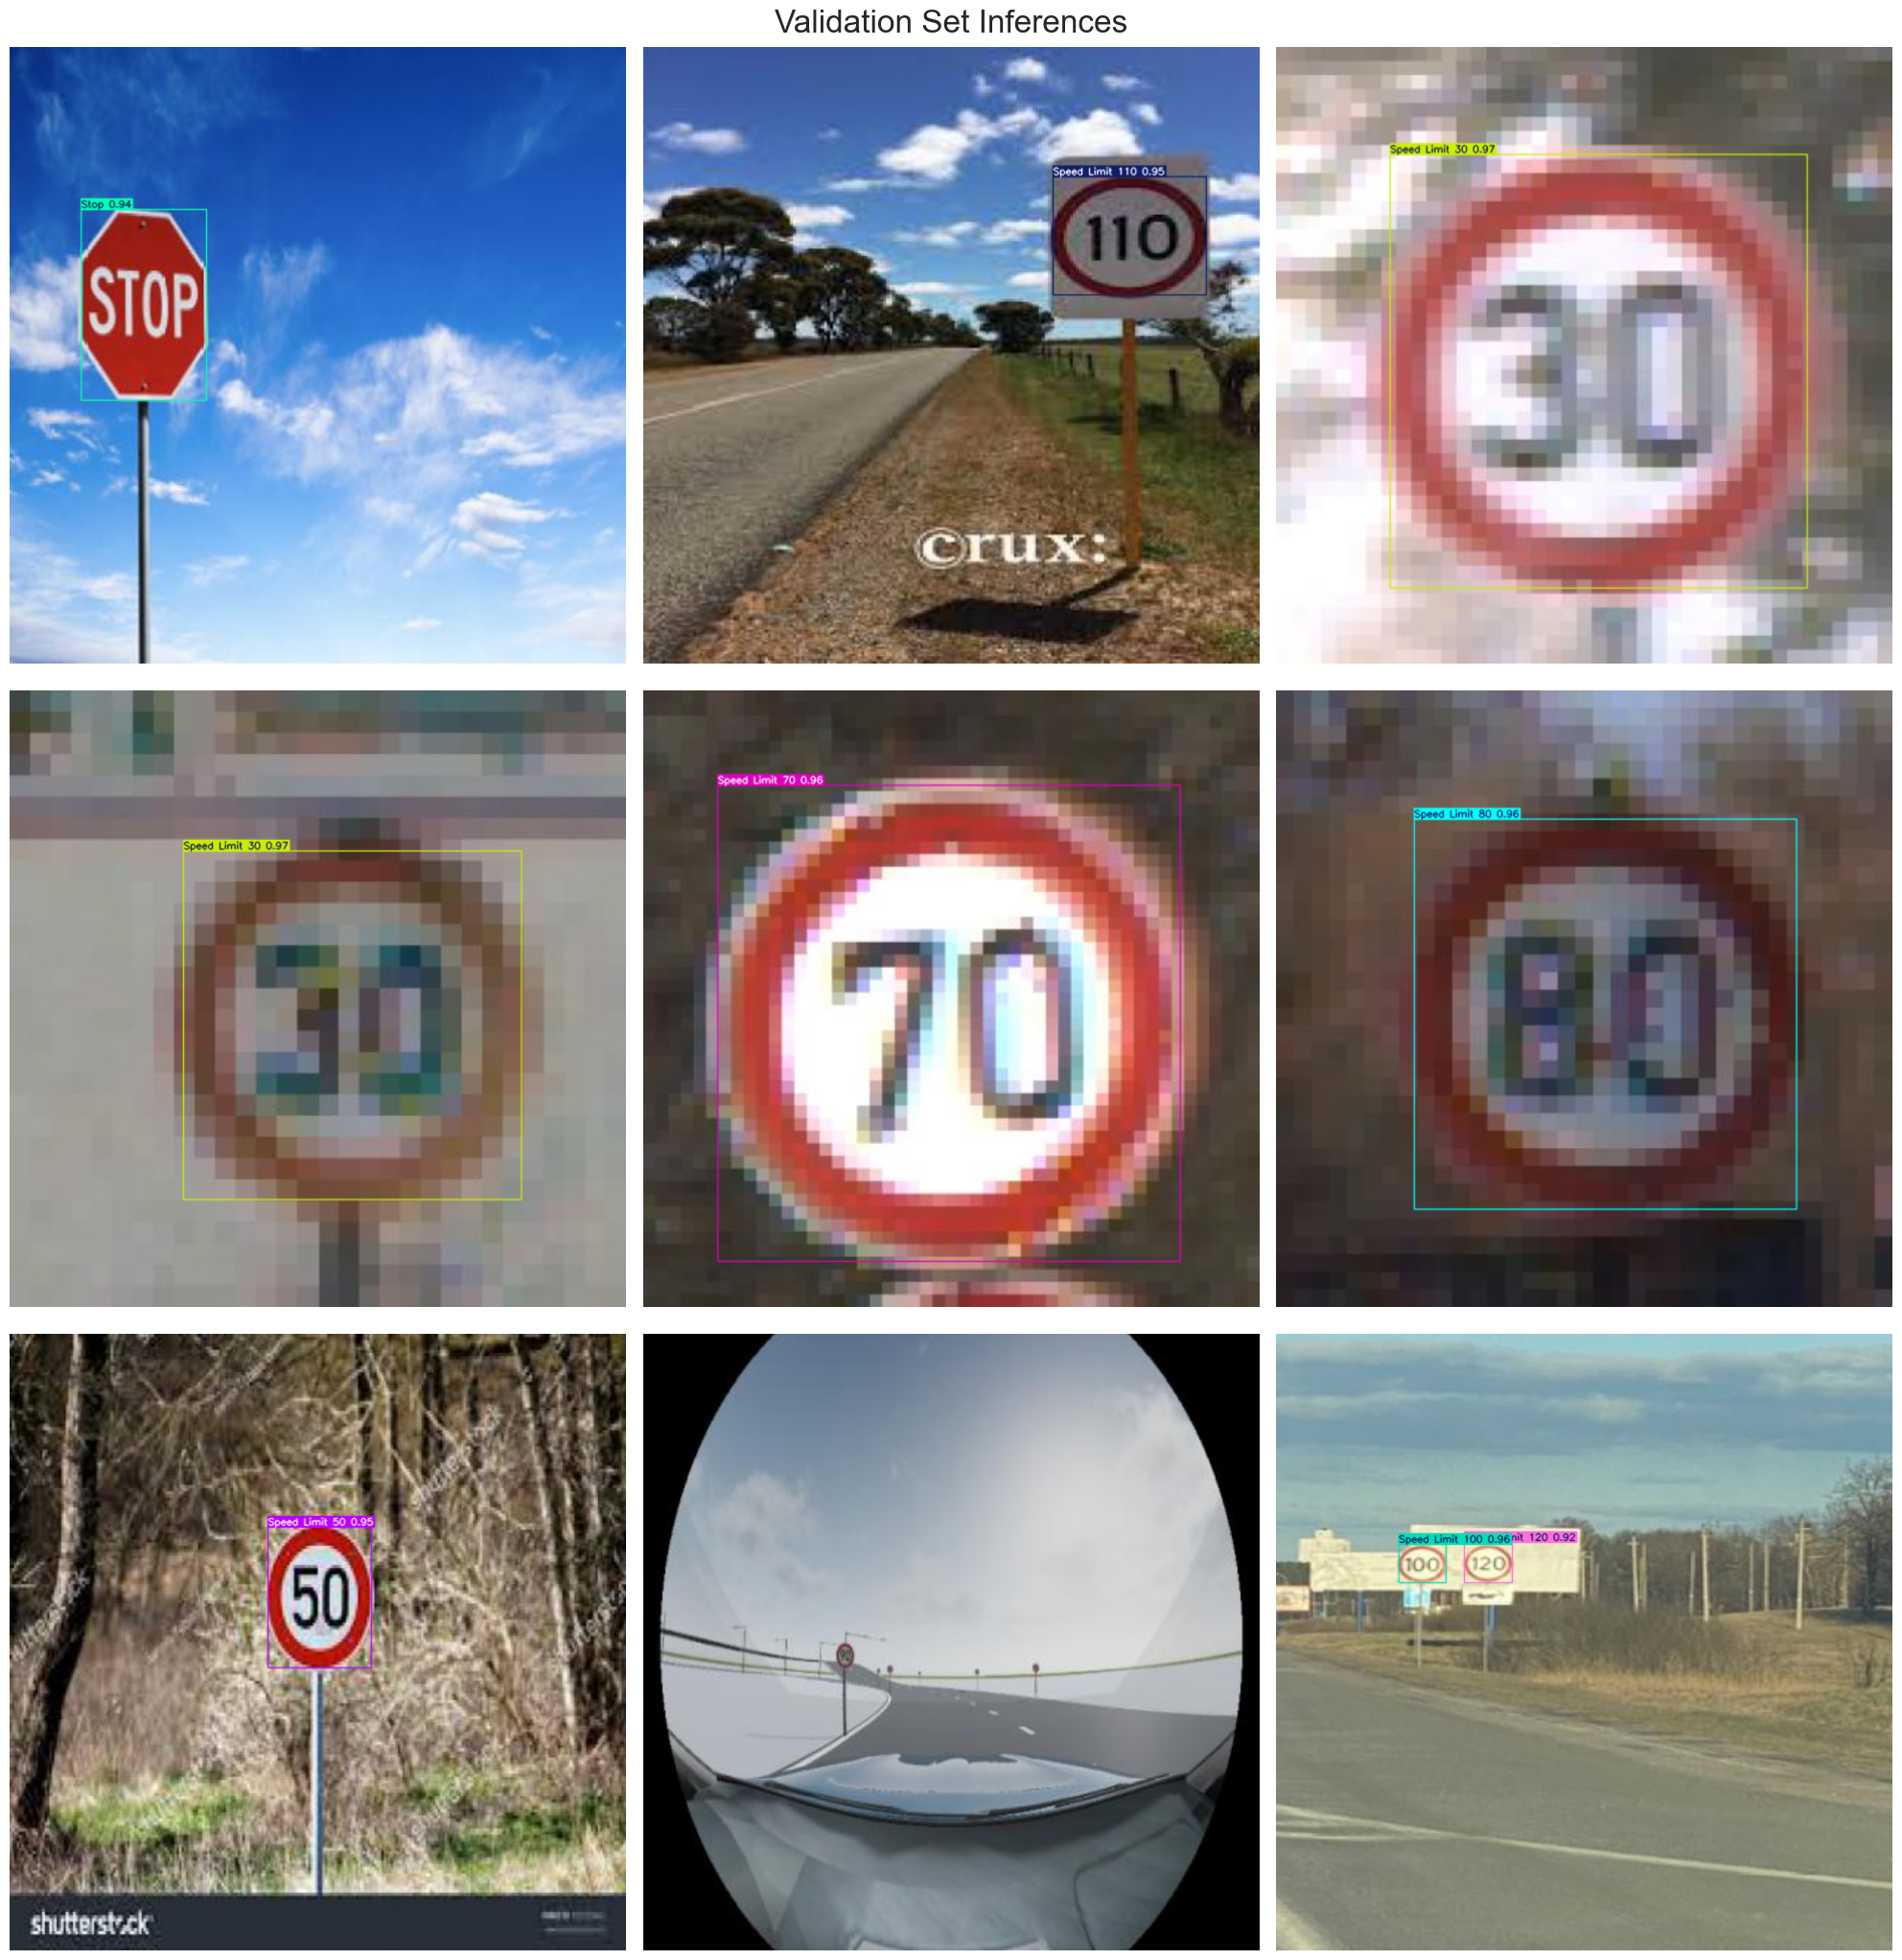

In [18]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = 'car/'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
